In [94]:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt


def pressure_forward(t, z, D, P0=1.0):
    """
    p(z,t) = P0 * erf( z / (2*sqrt(D*t)) )

    Parameters
    ----------
    t : array_like        # times [s]
    z : float or 1-D array  # distance(s) from boundary [m]
    D : float             # diffusivity [m² s⁻¹]
    P0: float             # step amplitude

    Returns
    -------
    p : ndarray           # shape (Nt, Nz)
    """
    t = np.asarray(t, dtype=float)                 # (Nt,)
    z = np.atleast_1d(z).astype(float)            # (Nz,) no matter what
    arg = z[None, :] / (2.0 * np.sqrt(D * t[:, None]))
    #print(z/np.sqrt(D*t))
    return P0 * erfc(arg)

def greensfunction(t, z, D, P0=1.0):
    t = np.asarray(t, dtype=float)                 # (Nt,)
    z = np.atleast_1d(z).astype(float)            # (Nz,) no matter what
    arg = z[None, :] / (2.0 * np.sqrt(D * t[:, None]))
    c = (P0/np.sqrt(4*np.pi*D*t[:, None]))*np.exp(-arg**2)
    return c
    
def finitewidthpulse(t, z, D, P0=1.0):
    t = np.asarray(t, dtype=float)                 # (Nt,)
    z = np.atleast_1d(z).astype(float)            # (Nz,) no matter what
    arg1 = (z[None, :]-2) / (2.0 * np.sqrt(D * t[:, None]))
    arg2 = (z[None, :]+2) / (2.0 * np.sqrt(D * t[:, None]))
    c = (P0/2)*(erfc(arg1)-erfc(arg1))
    return c
    

In [102]:
# example
t = np.linspace(0, 100*86400, 300)   # 0.1–60 days
z = 300                                  # 20 km (scalar OK)
D = 3.82e-4                                  # m²/s
p = pressure_forward(t, z, D)

/tmp/ipykernel_1423113/480001664.py:23: RuntimeWarning: divide by zero encountered in divide
  arg = z[None, :] / (2.0 * np.sqrt(D * t[:, None]))


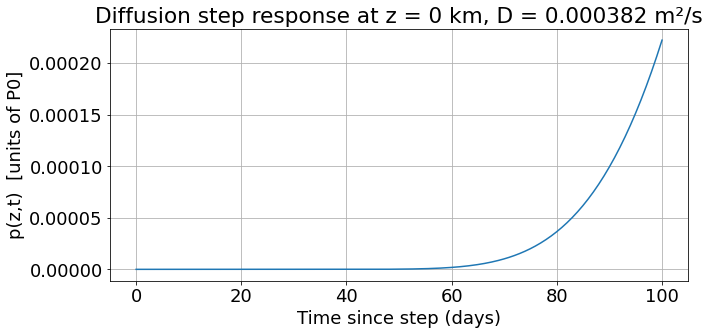

In [103]:
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 18})
plt.plot(t/86400, p)
plt.xlabel("Time since step (days)")
plt.ylabel("p(z,t)  [units of P0]")
plt.title(f"Diffusion step response at z = {z/1000:.0f} km, D = {D} m²/s")
plt.grid(True)
plt.tight_layout()

/tmp/ipykernel_1423113/480001664.py:30: RuntimeWarning: divide by zero encountered in divide
  arg = z[None, :] / (2.0 * np.sqrt(D * t[:, None]))
/tmp/ipykernel_1423113/480001664.py:31: RuntimeWarning: divide by zero encountered in divide
  c = (P0/np.sqrt(4*np.pi*D*t[:, None]))*np.exp(-arg**2)
/tmp/ipykernel_1423113/480001664.py:31: RuntimeWarning: invalid value encountered in multiply
  c = (P0/np.sqrt(4*np.pi*D*t[:, None]))*np.exp(-arg**2)


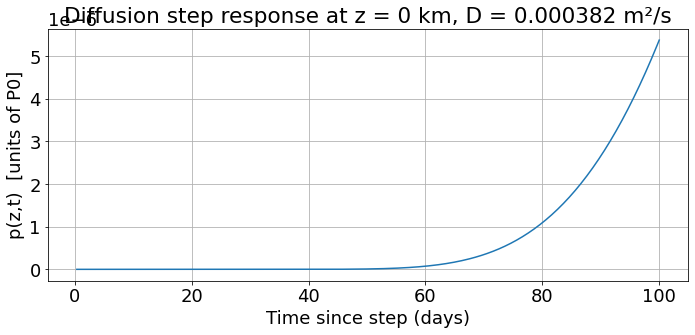

In [105]:
# example                                 # m²/s
p = greensfunction(t, z, D)

plt.figure(figsize=(10, 5))
plt.plot(t/86400, p)
plt.xlabel("Time since step (days)")
plt.ylabel("p(z,t)  [units of P0]")
plt.title(f"Diffusion step response at z = {z/1000:.0f} km, D = {D} m²/s")
plt.grid(True)
plt.tight_layout()

/tmp/ipykernel_1423113/480001664.py:37: RuntimeWarning: divide by zero encountered in divide
  arg1 = (z[None, :]-2) / (2.0 * np.sqrt(D * t[:, None]))
/tmp/ipykernel_1423113/480001664.py:38: RuntimeWarning: divide by zero encountered in divide
  arg2 = (z[None, :]+2) / (2.0 * np.sqrt(D * t[:, None]))


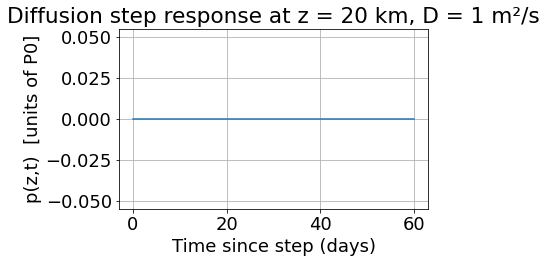

In [108]:
# example
t = np.linspace(0, 60*86400, 300)   # 0.1–60 days
z = 20000                                  # 20 km (scalar OK)
D = 1                    # m²/s
p = finitewidthpulse(t, z, D)

plt.figure()
plt.plot(t/86400, p)
plt.xlabel("Time since step (days)")
plt.ylabel("p(z,t)  [units of P0]")
plt.title(f"Diffusion step response at z = {z/1000:.0f} km, D = {D} m²/s")
plt.grid(True)
plt.tight_layout()

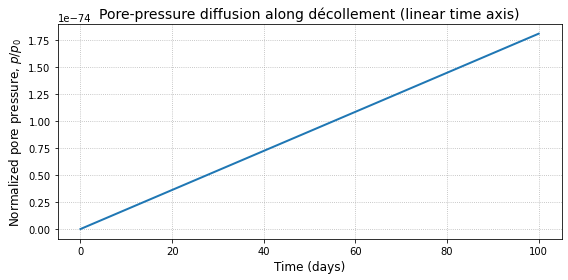

In [91]:
import numpy as np
import math
import matplotlib.pyplot as plt

# parameters
k     = 1e-14       # m^2
ne    = 0.1         # –
alpha = 1e-10       # Pa^-1
beta  = 4.4e-10     # Pa^-1
mu    = 1e-3        # Pa·s
x     = 20e3        # m along décollement

# compute hydraulic diffusivity D
D = k / (mu * (alpha + ne * beta))

# time array from 0 to 60 days (avoid exact zero in computation)
t_days = np.linspace(0, 100, 2)
t = t_days * 86400
t[0] = 1e-6  # small non-zero to prevent division-by-zero in erfc

# vectorized erfc
erfc = np.vectorize(math.erfc)

# normalized pressure response
p_xt = erfc(x / (2 * np.sqrt(D * t)))

# plot with linear time axis
plt.figure(figsize=(8, 4))
plt.plot(t_days, p_xt, lw=2)
#plt.xlim(0, 100)
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Normalized pore pressure, $p/p_0$', fontsize=12)
plt.title('Pore-pressure diffusion along décollement (linear time axis)', fontsize=14)
plt.grid(True, ls=':')
plt.tight_layout()
plt.show()


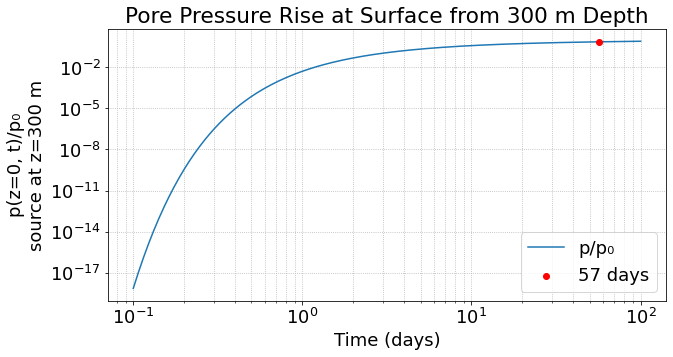

In [117]:
import numpy as np
import math
import matplotlib.pyplot as plt

# parameters (for vertical migration)
k     = 1e-14        # m^2, intrinsic permeability
ne    = 0.1          # effective porosity
alpha = 1e-10        # Pa^-1, matrix compressibility
beta  = 5.1e-10      # Pa^-1, fluid compressibility
mu    = 1e-3         # Pa·s, fluid viscosity

# compute hydraulic diffusivity D (vertical)
D = k / (mu * (alpha + ne * beta))

# vertical distance from source to surface
z = 300  # m

# times to sample (0.1 to 100 days)
t_days = np.logspace(-1, 2, 200)
t = t_days * 86400  # convert days to seconds

# analytical solution p/p0 for upward migration
p_zt = [math.erfc(z / (2 * math.sqrt(D * t_i))) for t_i in t]

# value at 57 days
t57 = 57  # days
t57_sec = t57 * 86400
p57 = math.erfc(z / (2 * math.sqrt(D * t57_sec)))

# plot
plt.figure(figsize=(10, 5))
plt.loglog(t_days, p_zt, label='p/p₀')
plt.scatter([t57], [p57], color='red', label='57 days', zorder=5)
plt.xlabel('Time (days)')
plt.ylabel('p(z=0, t)/p₀\nsource at z=300 m')
plt.title('Pore Pressure Rise at Surface from 300 m Depth')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.show()
